# Read and plot climate data 

Source of climate data:
1. https://disc.gsfc.nasa.gov/ 
2. https://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html

In [2]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


<class 'xarray.core.dataarray.DataArray'>


C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


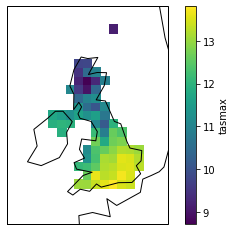

In [7]:

# Start and end dates
start_date = '1906-01-01' #'2010-01-01' #
end_date ='1919-01-01' #'2011-01-01' # 

# Configuration
variable_name = 'tasmax'
ds_name = 'hadukgrid'
area = 'uk'
horizontal_resolution = '60km'
frequency = 'mon'
file_fmt = 'nc'
date_fmt = '%Y%m'
proj_name = 'transverse_mercator'

# Define dates
start = pd.Timestamp(start_date)
end = pd.Timestamp(end_date)
dates = pd.date_range(start=start, end=end, freq='AS')

# Loop over years
ds = xr.Dataset()

folder= "C:/Users/lyubo/Documents/DATA_networks/climate_data/"
for k, date in enumerate(dates[:-1]):
    # Define path to year of data
    date0_str = date.strftime(date_fmt)
    datef_str = (dates[k + 1] - pd.Timedelta('2 days')).strftime(date_fmt)
    filepath = folder + '{}_{}_{}_{}_{}_{}-{}.{}'.format(
        variable_name, ds_name, area, horizontal_resolution, frequency,
        date0_str, datef_str, file_fmt)

    # Read data array
    ds_date = xr.open_dataset(filepath)

    # Add year to dataset
    ds = ds.merge(ds_date)

# Get data array
da = ds[variable_name]

# Get time mean
da_time_mean = da.mean('time')
print(type(da_time_mean))

# Get dataset projection
proj = ds[proj_name]
proj_params = dict(
    central_longitude=proj.attrs['longitude_of_central_meridian'],
    central_latitude=proj.attrs['latitude_of_projection_origin'],
    false_easting=proj.attrs['false_easting'],
    false_northing=proj.attrs['false_northing'],
    scale_factor=proj.attrs['scale_factor_at_central_meridian'])
crs = ccrs.TransverseMercator(**proj_params)

# Create axes for projection
fig = plt.figure()
ax = plt.axes(projection=crs)

# Plot mean
da_time_mean.plot(transform=crs)

# Draw coastlines
ax.coastlines()

# Show plots
plt.show(block=False)


# Get number of heatwaves days

Here we need to extract temperature data above the average, e.g. detect heatwaves.

Alternative way of reading NETCDF file is here:
https://unidata.github.io/netcdf4-python/netCDF4/index.html
   
We take NETCDF file as an example of a typical climatological file.

In [11]:
from netCDF4 import Dataset
rootgrp = Dataset("C:/Users/lyubo/Documents/DATA_networks/climate_data/tasmax_hadukgrid_uk_60km_mon_188701-188712.nc", "w", format="NETCDF4")#        tasmax_hadukgrid_uk_60km_mon_188401-188412
print(rootgrp.data_model)


#netcdf = read()

NETCDF4


In [12]:
print(rootgrp.dimensions)

OrderedDict()


In [13]:
for dimobj in rootgrp.dimensions.values():
    print(dimobj)